In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
from datetime import date, timedelta
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [33]:
today = date.today()
end_date = today.strftime("%Y-%m-%d")

interval = "1h"
interval_map = {
    "1m": timedelta(minutes=60*24*7),
    "1h": timedelta(hours=24*90),
    "1d": timedelta(days=365*1),   
}

start_date = (today - interval_map[interval]).strftime("%Y-%m-%d")

ticker1 = "BZ=F"
ticker2 = "CL=F"
df1 = yf.download(ticker1, start=start_date, end=end_date, interval=interval)
df2 = yf.download(ticker2, start=start_date, end=end_date, interval=interval)

# Use common index to align dates.
df = pd.DataFrame(index=df1.index)


colname = "Adj Close"
df["S1"] = df1[colname]
df["S2"] = df2[colname]

df.index = pd.to_datetime(df.index)

# Drop missing entries
df.dropna(inplace=True)

df.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,S1,S2
2022-11-03 14:00:00-04:00,94.779999,88.250000
2022-11-03 15:00:00-04:00,94.639999,88.080002
2022-11-03 16:00:00-04:00,94.440002,87.949997
2022-11-03 18:00:00-04:00,94.489998,87.959999
2022-11-03 19:00:00-04:00,94.570000,88.029999


In [34]:
jres = coint_johansen(df, det_order=1, k_ar_diff=1)

In [35]:
jres.eig

array([0.00880371, 0.00496285])

In [36]:
jres.evec

array([[ 1.17775883, -0.26323368],
       [-1.18541348, -0.01416764]])

In [37]:
# Take evec corresponding to largest eig (check if jres.eig is sorted)
w = jres.evec[0]
w

array([ 1.17775883, -0.26323368])

In [42]:
v = w/w[0]
v

array([ 1.        , -0.22350389])

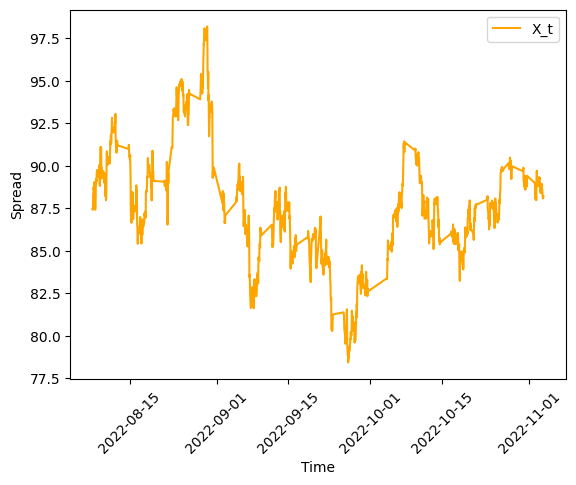

In [45]:
df["spread"] = w[0]*df["S1"] + w[1]*df["S2"]

plt.plot(df.index, df["spread"], color="orange", label="X_t")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Spread")
plt.xticks(rotation=45)
plt.show()